# Tweet Emotion Recognition: Natural Language Processing with TensorFlow

In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


# Importing Data

In [27]:
dataset=nlp.load_dataset("emotion",cache_dir="./")

Using custom data configuration default


Downloading: 100%|██████████| 1.66M/1.66M [00:05<00:00, 315kB/s]
Downloading: 100%|██████████| 204k/204k [00:13<00:00, 15.2kB/s]
Downloading: 100%|██████████| 207k/207k [00:00<00:00, 226kB/s]
                                

Dataset emotion downloaded and prepared to ./emotion\default\0.0.0\84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [28]:
dataset

{'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [29]:
train=dataset["train"]
val=dataset["validation"]
test=dataset["test"]

In [31]:
def get_tweet(data):
    tweets=[x["text"] for x in data]
    labels=[x["label"] for x in data]
    return tweets, labels

In [32]:
tweets,labels = get_tweet(train)

In [33]:
tweets[1],labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

# Tokenizing the data

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
vocab_size = 10000
embedding_dim = 16
trunc_type='post'
pad_type="post"
oov_tok = "<OOV>"


In [ ]:

tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(tweets)

In [41]:
word_index=tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'feel': 3,
 'and': 4,
 'to': 5,
 'the': 6,
 'a': 7,
 'feeling': 8,
 'that': 9,
 'of': 10,
 'my': 11,
 'in': 12,
 'it': 13,
 'like': 14,
 'so': 15,
 'for': 16,
 'im': 17,
 'me': 18,
 'but': 19,
 'was': 20,
 'have': 21,
 'is': 22,
 'this': 23,
 'am': 24,
 'with': 25,
 'not': 26,
 'about': 27,
 'be': 28,
 'as': 29,
 'on': 30,
 'you': 31,
 'just': 32,
 'at': 33,
 'when': 34,
 'or': 35,
 'all': 36,
 'because': 37,
 'more': 38,
 'do': 39,
 'can': 40,
 'really': 41,
 'up': 42,
 't': 43,
 'are': 44,
 'by': 45,
 'very': 46,
 'know': 47,
 'been': 48,
 'if': 49,
 'out': 50,
 'myself': 51,
 'time': 52,
 'how': 53,
 'what': 54,
 'get': 55,
 'little': 56,
 'had': 57,
 'now': 58,
 'will': 59,
 'from': 60,
 'being': 61,
 'they': 62,
 'people': 63,
 'them': 64,
 'would': 65,
 'he': 66,
 'want': 67,
 'her': 68,
 'some': 69,
 'think': 70,
 'one': 71,
 'still': 72,
 'ive': 73,
 'him': 74,
 'even': 75,
 'who': 76,
 'an': 77,
 'life': 78,
 'its': 79,
 'make': 80,
 'there': 81,
 'we': 

In [42]:
print(tweets[0])
tokenizer.texts_to_sequences([tweets[0]])

i didnt feel humiliated


[[2, 139, 3, 679]]

# Padding and Trucating the Tweets

### Finding the best maxlen parameter

In [48]:
lengths=[len(t.split()) for t in tweets]

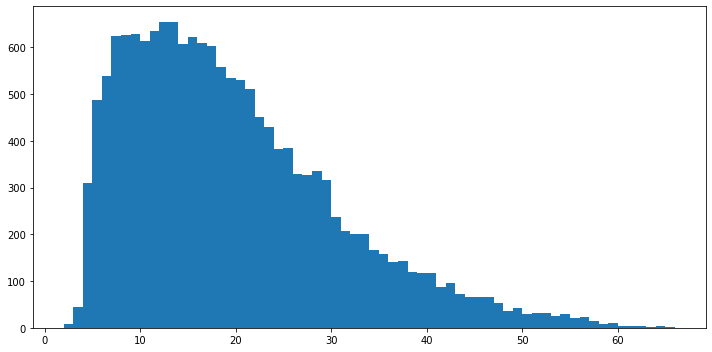

In [59]:
#np.array(lengths)
plt.figure(figsize=(10,5))
plt.hist(lengths,bins=len(set(lengths)))
plt.tight_layout()
plt.show()

In [62]:
def get_sequences(tokenizer,tweets):
    sequences=tokenizer.texts_to_sequences(tweets)
    padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type,padding=pad_type)
    return padded

In [63]:
padded_train_seq=get_sequences(tokenizer,tweets)

In [64]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

# Preparing the labels for processing

In [67]:
from sklearn.preprocessing import LabelEncoder

In [74]:
classes=set(labels)

In [75]:
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

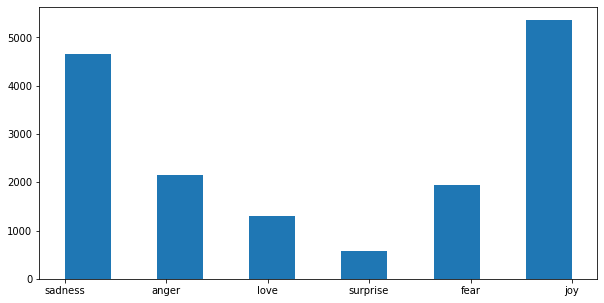

In [78]:

## Distribtion of labels

plt.figure(figsize=(10,5))
plt.hist(labels,bins=11)
plt.show()

In [86]:
le=LabelEncoder()
train_labels=le.fit_transform(labels)

In [87]:
train_labels

array([4, 4, 0, ..., 2, 0, 4], dtype=int64)

### The index position of labels

In [88]:
print(le.classes_)
le.transform(le.classes_)

['anger' 'fear' 'joy' 'love' 'sadness' 'surprise']


array([0, 1, 2, 3, 4, 5])

# Creating the Model

In [89]:
from tensorflow.keras.layers import *

In [95]:
model=tf.keras.Sequential([

    Embedding(vocab_size,embedding_dim,input_length=max_length),
    Bidirectional(LSTM(20,return_sequences=True)),
    Bidirectional(LSTM(20)),
    Dense(6,activation="softmax")
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(
            loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"]
            )
            


### Preparing the validation data

In [93]:
val_tweets,val_labels=get_tweet(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=le.transform(val_labels)

In [97]:
history=model.fit(padded_train_seq,train_labels,
        validation_data=(val_seq,val_labels),
        epochs=20,
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=2)])

Epoch 1/20
500/500 [==============================] - 25s 40ms/step - loss: 1.3518 - accuracy: 0.4684 - val_loss: 0.8436 - val_accuracy: 0.7100
Epoch 2/20
500/500 [==============================] - 17s 35ms/step - loss: 0.4694 - accuracy: 0.8411 - val_loss: 0.4004 - val_accuracy: 0.8640
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2160 - accuracy: 0.9301 - val_loss: 0.3674 - val_accuracy: 0.8785
Epoch 4/20
500/500 [==============================] - 21s 41ms/step - loss: 0.1497 - accuracy: 0.9513 - val_loss: 0.3726 - val_accuracy: 0.8780
Epoch 5/20
500/500 [==============================] - 16s 31ms/step - loss: 0.1112 - accuracy: 0.9638 - val_loss: 0.3787 - val_accuracy: 0.8850
Epoch 6/20
500/500 [==============================] - 18s 35ms/step - loss: 0.0899 - accuracy: 0.9711 - val_loss: 0.3643 - val_accuracy: 0.8985
Epoch 7/20
500/500 [==============================] - 17s 34ms/step - loss: 0.0741 - accuracy: 0.9763 - val_loss: 0.3984 - val_accuracy:

# Evaluating the model

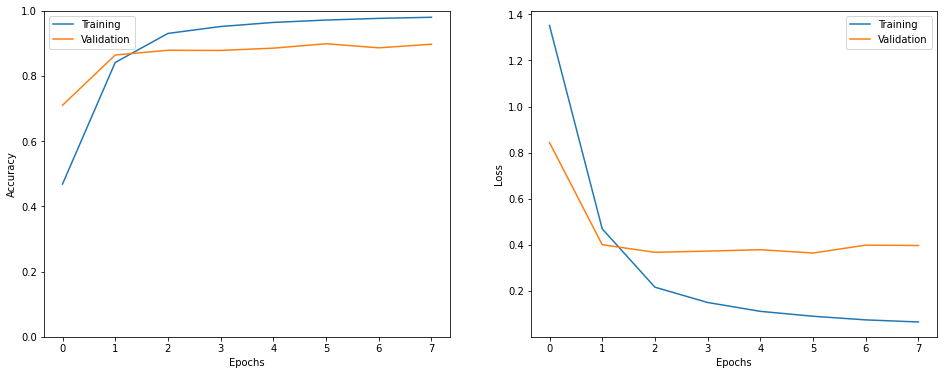

In [98]:
show_history(history)

In [99]:
test_tweets,test_lables=get_tweet(test)
test_seq=get_sequences(tokenizer,test_tweets)
test_lables=le.transform(test_lables)

In [101]:
model.evaluate(test_seq,test_lables)

63/63 [==============================] - 1s 13ms/step - loss: 0.4086 - accuracy: 0.8850


[0.40863385796546936, 0.8849999904632568]

In [115]:
i = random.randint(0,len(test_lables)-1)
print(" Sentence : ",test_tweets[i])
print("Emotion : ",get_emotion(test_lables[i]))

p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
print(get_emotion(np.argmax(p)))
#print(get_emotion(p))

 Sentence :  i just feel totally useless today
Emotion :  sadness
sadness


In [110]:
def get_emotion(data):
    lis=le.transform(le.classes_)

    for i in range(len(le.classes_)):
        
        if data==lis[i]:
            return le.classes_[i]

# Saving the model

In [116]:
model.save("./tweet_emotion.h5")


In [119]:
model1=tf.keras.models.load_model("./tweet_emotion.h5")

In [132]:
preds=model.predict(test_seq)

In [133]:
new_pred=[]
for i in range(len(preds)):
    new_pred.append(np.argmax(preds[i]))
#np.argmax(preds[0])

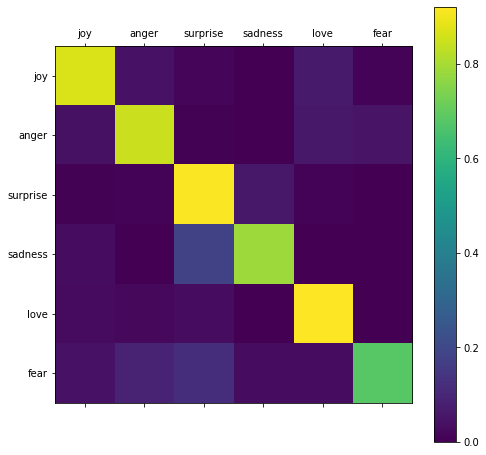

In [135]:
show_confusion_matrix(test_lables,new_pred,list(classes))